<center>
    <h1>CYPRUS INTERNATIONAL UNIVERSITY</h1>
    <h2><b>School of Applied Science</b></h2>
    <h3>Department of <span style="color:black;">Data Science</span></h3>
    <br>
    <img src="https://moodle.ciu.edu.tr/pluginfile.php/1/core_admin/logocompact/300x300/1728932360/ciulogo.png", width="150",height="150">
    <br><br>
    <h3><b>Name & Surname :</b></h3><span style="color:blue;"> TIMOTHEE KABONGO NKWAR</span></h3>
    <h3><b>INSTRUCTOR :</b> <span style="color:blue;">Dr. Yasemin Bay</span></h3>
    <h3><b>COURSE NAME :</b> <span style="color:blue;">DASC311 Statistical Machine Learning</span></h3>
    <br>
    <h3><b>Student ID:</b><span style="color:blue;">22205731</span> <span style="color:red;"></span></h3>
</center>


# 1 LOGISTIC REGRESSION

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
Male_or_female_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
data = Male_or_female_based_on_eating_habits_and_physical_condition.data.features 

***link to the dataset : (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition-)***

###  Information information


***This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia,***
***based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled***
***with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight,***
***Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was*** 
***generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.***

**Logistic Regression is a supervised learning algorithm used for binary classification (and extended to multiclass with variations). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and classifies data into**

In [4]:
# check the size of the dataset
data.shape

(2111, 16)

In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# load the data
data 
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


## DATA PREPROCESSING AND EDA

In [7]:
# Convert the gender into a boolean
data_encoded = pd.get_dummies(data, columns=["Gender", "CAEC", "CALC", "MTRANS",
                                             "family_history_with_overweight","SMOKE"],
                              drop_first=True,dtype=int)

# delete some useless columns
data_encoded.drop( columns =['family_history_with_overweight_yes','FAVC','SCC','SMOKE_yes',
                             'CALC_no','CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'MTRANS_Motorbike',
                             'MTRANS_Public_Transportation', 'MTRANS_Walking','CAEC_Frequently','CALC_Sometimes',  
                             'MTRANS_Bike'], axis=1, inplace=True)

# rename the colonne Gender_male tu Gender
data_encoded.rename(columns={'Gender_Male':"Gender"}, inplace=True)
data_encoded.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [8]:
import plotly.express as px
fig = px.scatter(data_encoded,x="Age",y="Weight",color="Gender")
fig.update_layout(
    title="Distribution of gender over Age and Weight",
    xaxis_title="Age",
    yaxis_title="Weight",
    template="plotly_dark",
    height=400,
    width=800
)
fig.show()



In [9]:



gender_counts = data_encoded["Gender"].value_counts().reset_index()
gender_counts.columns = ["Gender", "Count"]


fig = px.bar(
    gender_counts,
    x="Count",
    y="Gender",
    orientation="h",
    template="plotly_dark",
    width=800,
)
fig.update_layout(
    height=300,     
    bargap=0.5    
)
fig.show()


<Axes: ylabel='Height'>

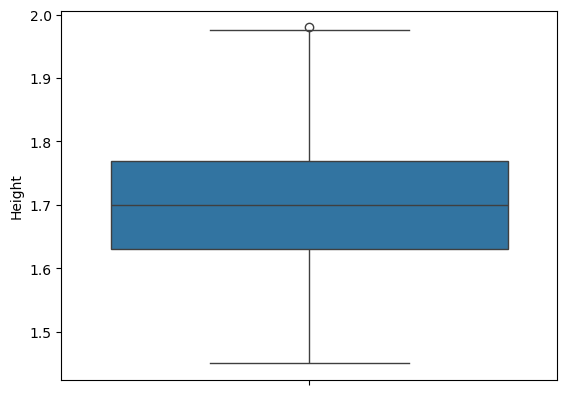

In [10]:
sns.boxplot(data_encoded["Height"])

<Axes: ylabel='Weight'>

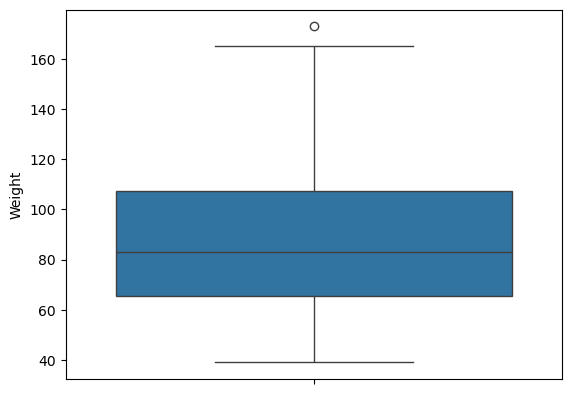

In [11]:
sns.boxplot(data_encoded["Weight"])

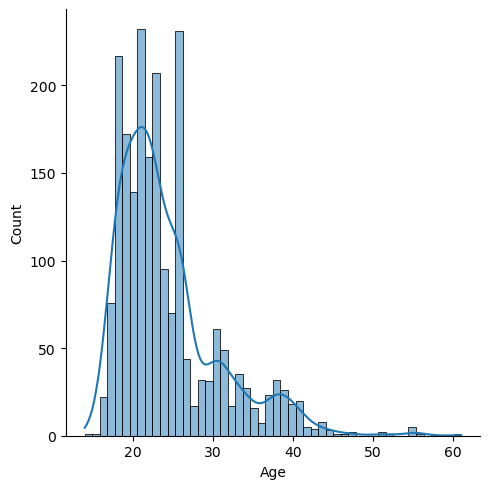

In [12]:
sns.displot(data_encoded["Age"],kde=True)

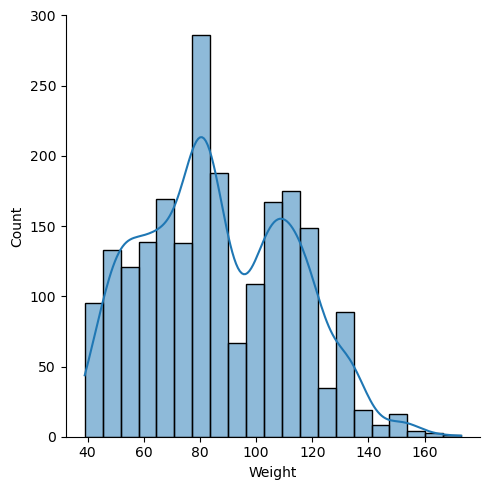

In [13]:

sns.displot(data_encoded["Weight"],kde=True)

In [14]:

data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [15]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2111 non-null   float64
 1   Height  2111 non-null   float64
 2   Weight  2111 non-null   float64
 3   FCVC    2111 non-null   float64
 4   NCP     2111 non-null   float64
 5   CH2O    2111 non-null   float64
 6   FAF     2111 non-null   float64
 7   TUE     2111 non-null   float64
 8   Gender  2111 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 148.6 KB


In [16]:
# Statistics for the data
data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00


In [17]:
# there are no null values
data_encoded.isnull().sum()

Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
Gender    0
dtype: int64

In [18]:
data_encoded.duplicated()
data_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1


In [19]:

#FAF : Physical activity frequency
#TUE : Time using technology devices
#FCVC : Frequency of consumption of vegetables
#NCP : Number of main meals
#CH2O : Consumption of water daily

## MODEL SELECTION

In [20]:
# Splitting the dataset into the Training set and Test set 


from sklearn.model_selection import train_test_split
X = data_encoded.drop(columns = ['Gender'], axis=1).values
y = data_encoded["Gender"]
'''
#why scaling is important?
# because the range of values of raw data varies widely
# so, the range of all features should be standardized so that each feature contributes approximately proportionately 
to the final distance

'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data_encoded.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(data_encoded_scaled, y, test_size = 0.2, random_state = 0)
data_encoded_scaled.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [21]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
# what is X_train ?  X-train is the training data
# what is X_test ? X-test is the test data 
# what is y_train ? y-train is the training data and it is the target variable
# what is y_test ? y-test is the test data and it is the target variable


((2111, 8), (2111,), (1688, 8), (423, 8), (1688,), (423,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
# why solver and max_iterations? solver is the algorithm to use in the optimization problem and max_iterations is the maximum number of iterations taken for the solvers to converge
log_reg = LogisticRegression(solver='liblinear',max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [23]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [24]:

y_pred[0]

np.int64(1)

## MODEL EVALUATION

In [25]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       231
           1       0.78      0.79      0.79       192

    accuracy                           0.80       423
   macro avg       0.80      0.80      0.80       423
weighted avg       0.80      0.80      0.80       423



In [26]:
# 80% of accuracy ,which is good
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score


0.8037825059101655

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[188,  43],
       [ 40, 152]])

### TEST THE MODEL ON UNSEEN DATA

In [28]:
# Save the model
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [29]:
# Load the model
log_reg_model = joblib.load("logistic_regression_model.pkl")   
#we can see the type of the model
type(log_reg_model)

sklearn.linear_model._logistic.LogisticRegression

In [30]:
#let's predict the new data 
new_data1 = [[35,1.7,70,3,5,0,3,4]]
# let's scale the new data
new = pd.DataFrame(scaler.transform(new_data1), columns = data_encoded.columns[:-1])

In [31]:
#here the new data is scaled
new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.684523,-0.017981,-0.633419,1.088342,2.975328,-3.276737,2.33975,5.489861


In [32]:
#let's predict the new data
prediction1 = log_reg_model.predict(new)
if prediction1 == 0:
     print("The gender is female!")
else:
     print("The gender is male !")

The gender is female!


In [33]:
#let's predict the new data2 
new_data2 = [[85,2.9,80,3,5,0,3,78]]
# let's scale the new data2
new2 = pd.DataFrame(scaler.transform(new_data2), columns = data_encoded.columns[:-1])
new2

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,9.565409,12.846138,-0.251521,1.088342,2.975328,-3.276737,2.33975,127.043843


In [34]:
#let's predict the new data2
prediction2 = log_reg_model.predict(new2)
if prediction2 == 0:
     print("The gender is female !")
else:
     print("The gender is male !")

The gender is male !


## *CONCLUSIONS*

***The model is good , it has an accuracy of about 80% .***

# 2 LINEAR REGRESSION

In [ ]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
data2 = real_estate_valuation.data.features 
target2 = real_estate_valuation.data.targets 

***link to the dataset : (https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set)***

## Dataset Information

***The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.***
***The â€œreal estate valuationâ€ is a regression problem.***
***The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).***


***Linear Regression is a supervised learning algorithm used for predicting continuous values.***
***It models the relationship between one or more independent variables (X)***
***and a dependent variable (y) by fitting a linear equation***

In [36]:
#load the 5 rows of the dataset (input)
data2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [37]:
# check for null values
data2.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [38]:
data2.rename(columns={
    'X1 transaction date': 'X1',
    'X2 house age': 'X2',
    'X3 distance to the nearest MRT station': 'X3',
    'X4 number of convenience stores': 'X4',
    'X5 latitude': 'X5',
    'X6 longitude': 'X6'
}, inplace=True)
data2.head()

C:\Users\KOVVO\AppData\Local\Temp\ipykernel_19760\840542019.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [39]:
data2["X1"]

0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: X1, Length: 414, dtype: float64

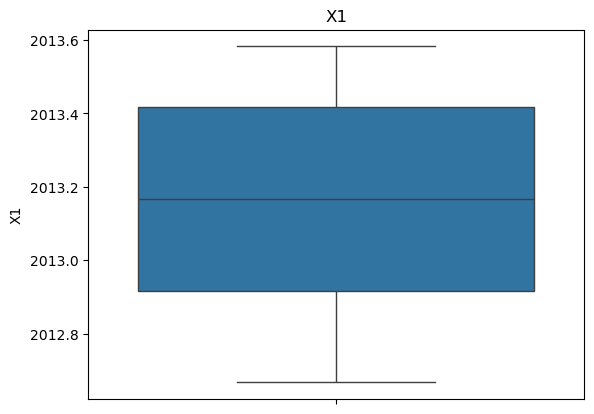

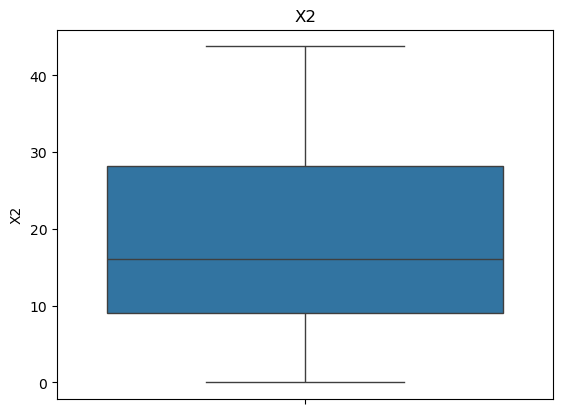

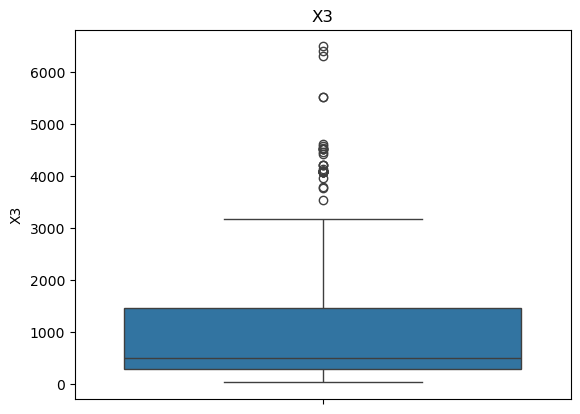

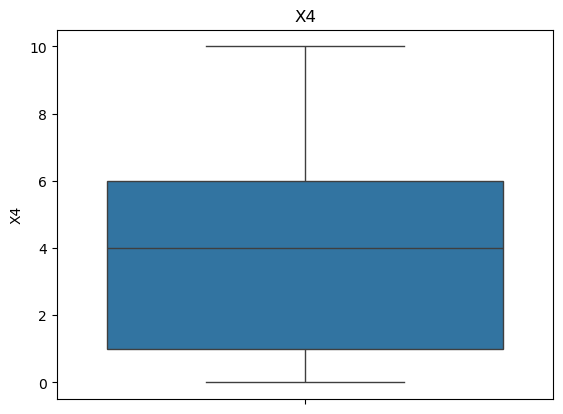

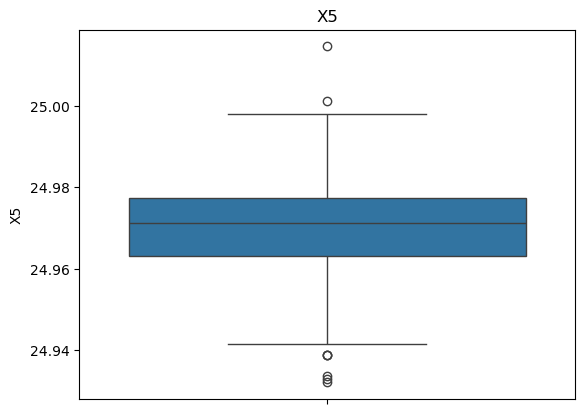

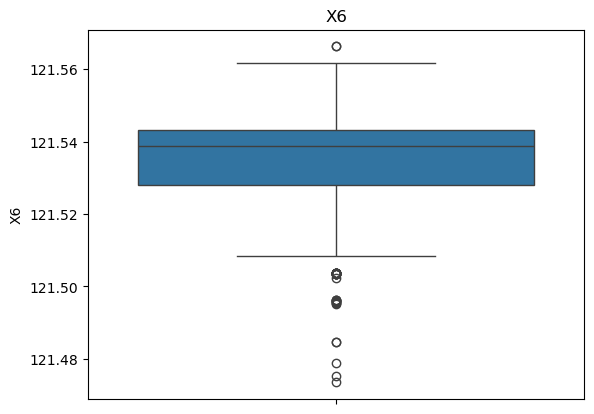

In [40]:
for i in range(len(data2.columns)):
        sns.boxplot(data2[data2.columns[i]])
        plt.title(data2.columns[i])
        plt.show()

In [41]:

print(data2.info())
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None


In [42]:
#some statistics analysis
print(data2.describe())

                X1          X2           X3          X4          X5  \
count   414.000000  414.000000   414.000000  414.000000  414.000000   
mean   2013.148971   17.712560  1083.885689    4.094203   24.969030   
std       0.281967   11.392485  1262.109595    2.945562    0.012410   
min    2012.667000    0.000000    23.382840    0.000000   24.932070   
25%    2012.917000    9.025000   289.324800    1.000000   24.963000   
50%    2013.167000   16.100000   492.231300    4.000000   24.971100   
75%    2013.417000   28.150000  1454.279000    6.000000   24.977455   
max    2013.583000   43.800000  6488.021000   10.000000   25.014590   

               X6  
count  414.000000  
mean   121.533361  
std      0.015347  
min    121.473530  
25%    121.528085  
50%    121.538630  
75%    121.543305  
max    121.566270  


In [43]:
#load th 5 rows of the dataset (target)
target2.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [44]:
#The inputs are as follows: 

          #X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
          #X2=the house age (unit: year)
          #X3=the distance to the nearest MRT station (unit: meter)
          #X4=the number of convenience stores in the living circle on foot (integer)
          #X5=the geographic coordinate, latitude. (unit: degree)
          #X6=the geographic coordinate, longitude. (unit: degree)

#The output is as follow: 

     #Y= house price of unit area 
     # (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

### DATA PREPROCESSING  & MODEL SELECTION

In [45]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:

# Splitting the dataset into the Training set and Test set 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X =data2.values
y = target2.values

'''
# why scaling is important?
# because the range of values of raw data varies widely
# so, the range of all features should be standardized so 
that each feature contributes approximately proportionately to the final distance

'''

scaler_X = StandardScaler()



X_scaled = scaler_X.fit_transform(X)


data_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data2.columns)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=0)
print(data_scaled.head())

         X1        X2        X3        X4        X5        X6
0 -0.823683  1.255628 -0.792495  2.007407  1.125430  0.448762
1 -0.823683  0.157086 -0.616612  1.667503  0.912444  0.401139
2  1.541151 -0.387791 -0.414015  0.307885  1.486860  0.688183
3  1.246435 -0.387791 -0.414015  0.307885  1.486860  0.688183
4 -1.121951 -1.117223 -0.549997  0.307885  0.834188  0.592937


In [47]:
y[0]

array([37.9])

In [48]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model

lin_reg.fit(X_train, y_train)

# Make predictions on the test set

y_pred = lin_reg.predict(X_test)

y_pred[0]



array([40.09548022])

### MODEL EVALUATION

In [49]:
#evaluation of the regression

from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.760226029972716
Mean Squared Error: 59.522435319028915
Root Mean Squared Error: 7.715078438942077


#### Let's see the coefficients

In [50]:
coeffecients = pd.DataFrame(lin_reg.coef_)
coeffecients

,0,1,2,3,4,5
0,1.41387,-2.994112,-5.626562,3.214374,2.79498,-0.104334


### Here the intercept

In [51]:
lin_reg.intercept_ 

array([38.0359208])

In [52]:
import joblib
#save the model
joblib.dump(lin_reg,"model,my_lineair_model.pk1")


['model,my_lineair_model.pk1']

## *CONCLUSION*

***I choose this model because of the size of the dataset which is small.***
|      Metrics            |         Values                  |
|-------------------------|---------------------------------|
| Mean Absolute Error     |  5.760226029972716              |
| Mean Squared Error      |  59.522435319028915             |
| Root Mean Squared Error |  7.715078438942077              |

# 3 K Nearest neighbors

In [ ]:


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
data3 = abalone.data.features 

***Link to the dataset :https://archive.ics.uci.edu/dataset/1/abalone***

## Dataset Information
               
***Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone,***
***staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.*** 
***Other measurements, which are easier to obtain, are used to predict the age.***

***K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression. It is simple and effective, based on the proximity of data points in feature space.***

### DATA PREPARATION AND EDA

In [54]:
data3.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [55]:
data3["Sex"].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [56]:
data3_cleaned = data3[~data3.isin(['I']).any(axis=1)]
data3_cleaned.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330


In [57]:
data3_cleaned["Sex"].value_counts()

Sex
M    1528
F    1307
Name: count, dtype: int64

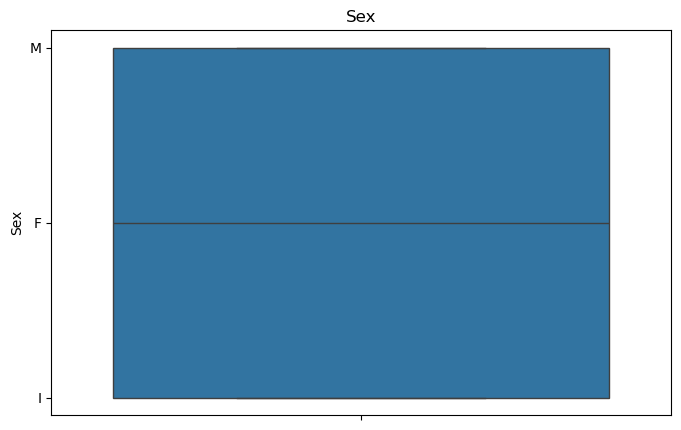

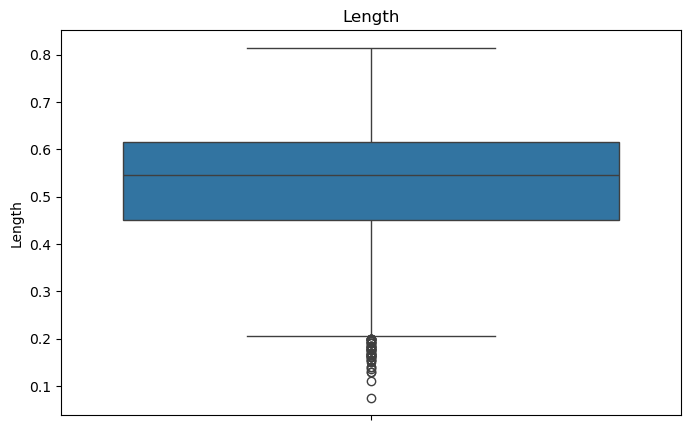

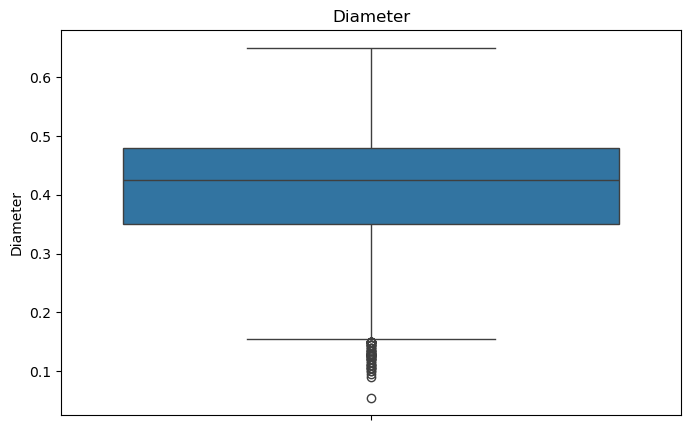

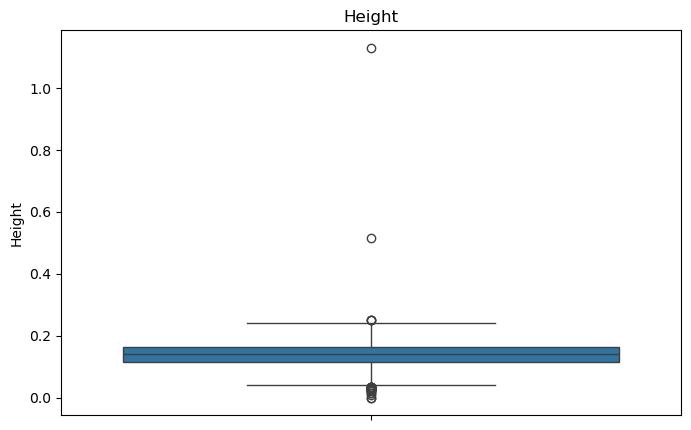

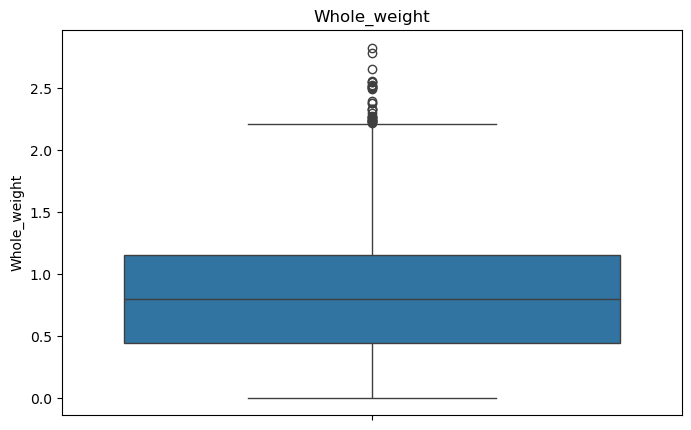

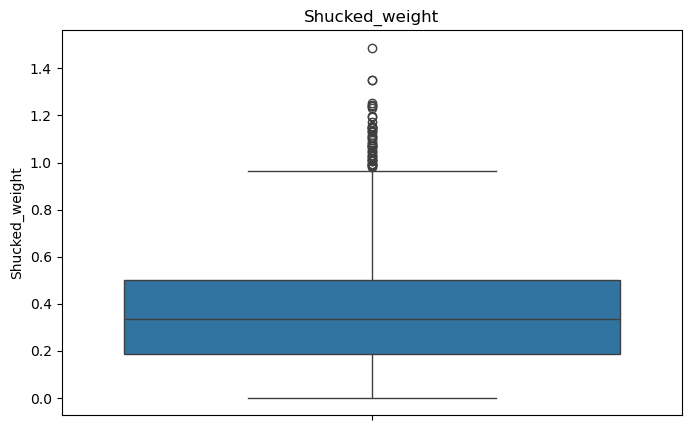

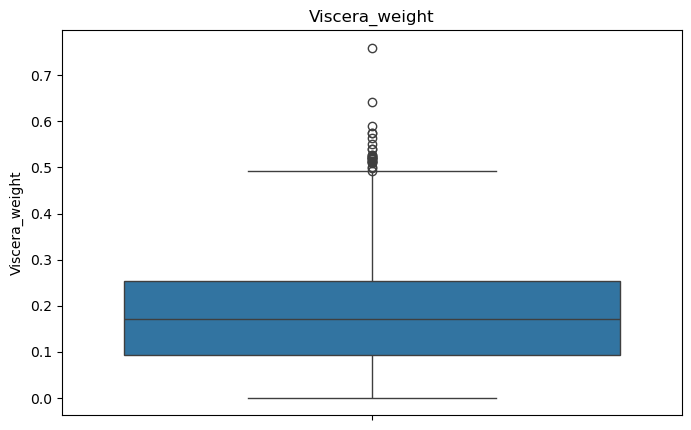

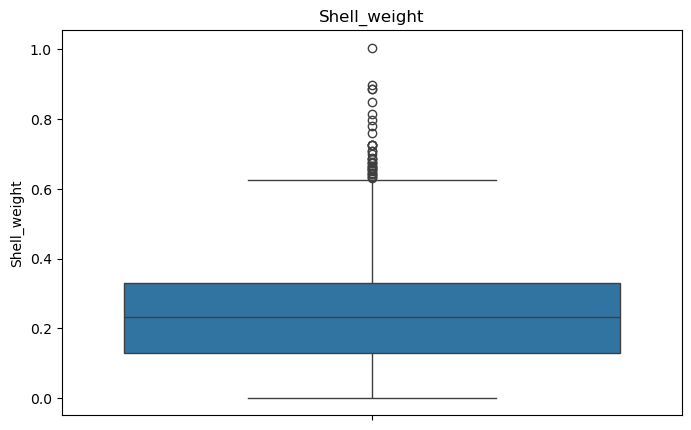

In [58]:
numeric_cols = data3.select_dtypes(exclude="string").columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data3[col])
    plt.title(col)  # 
    plt.show()  # 

In [59]:
data3_cleaned["Sex"].value_counts()

Sex
M    1528
F    1307
Name: count, dtype: int64

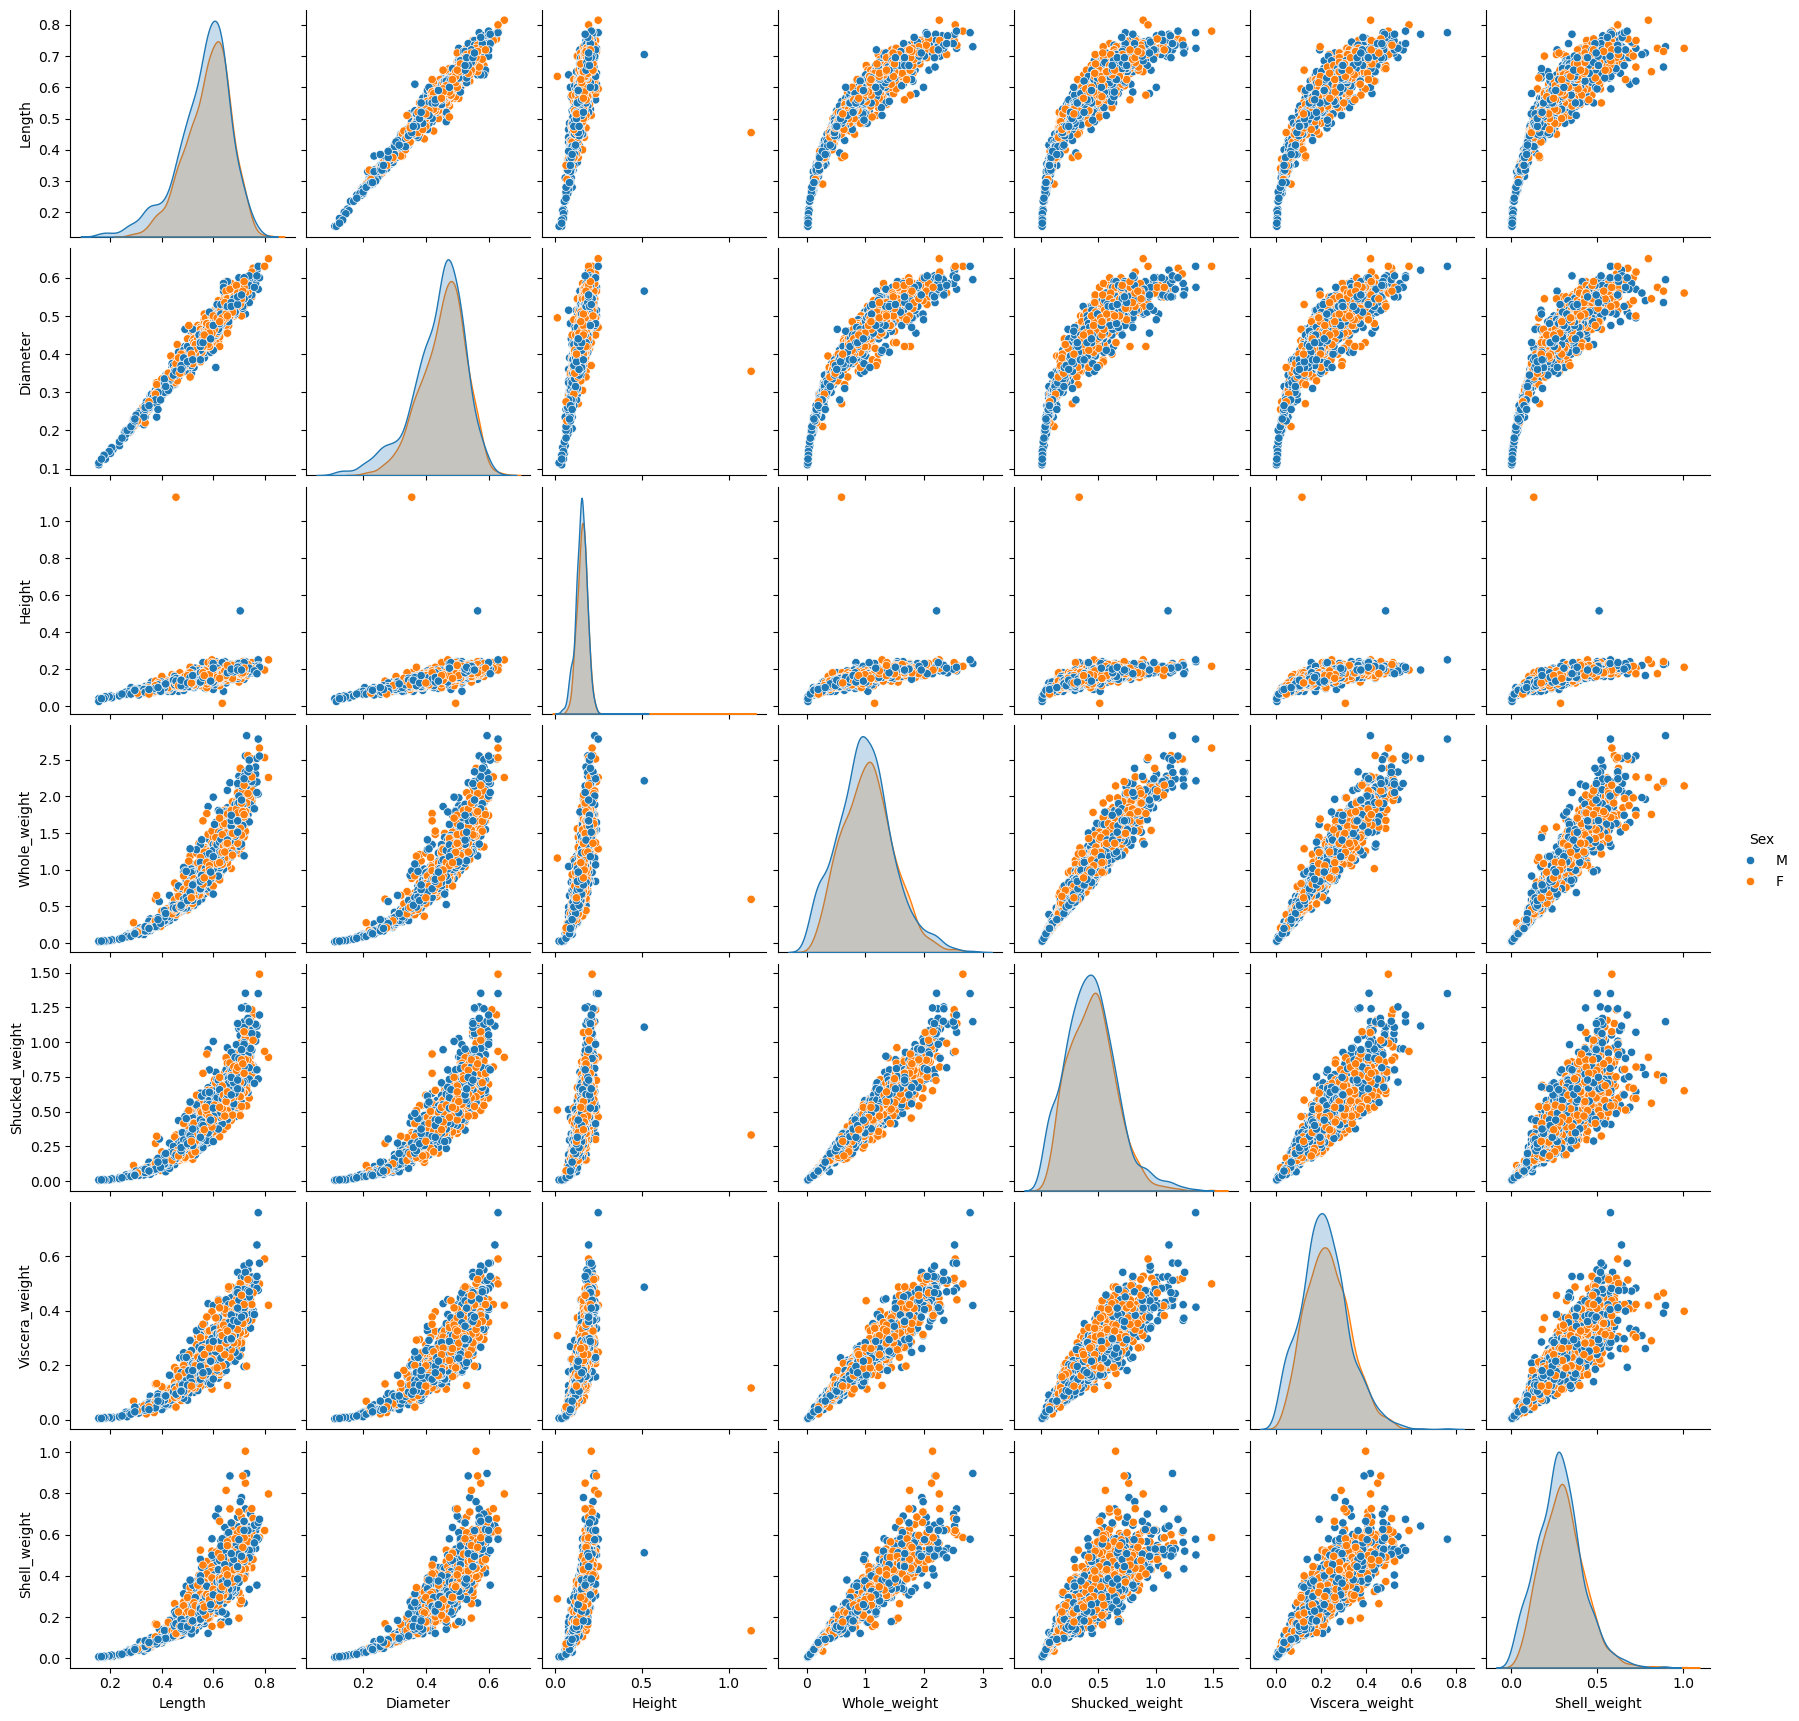

In [60]:
sns.pairplot(data3_cleaned,hue="Sex",)

In [61]:
data3_cleaned.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [62]:
print(data3_cleaned.describe())


            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  2835.000000  2835.000000  2835.000000   2835.000000     2835.000000   
mean      0.569552     0.446407     0.154437      1.016849        0.439051   
std       0.095821     0.078850     0.037421      0.453217        0.212193   
min       0.155000     0.110000     0.015000      0.015500        0.006500   
25%       0.515000     0.400000     0.135000      0.701250        0.287000   
50%       0.585000     0.460000     0.155000      1.003000        0.431500   
75%       0.635000     0.500000     0.175000      1.289500        0.568750   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight  
count     2835.000000   2835.000000  
mean         0.222526      0.291208  
std          0.101880      0.128835  
min          0.003000      0.005000  
25%          0.152000      0.202500  
50%          0.217000      0.285000  
75%          0.287500      0.36

In [63]:
print(data3_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2835 non-null   object 
 1   Length          2835 non-null   float64
 2   Diameter        2835 non-null   float64
 3   Height          2835 non-null   float64
 4   Whole_weight    2835 non-null   float64
 5   Shucked_weight  2835 non-null   float64
 6   Viscera_weight  2835 non-null   float64
 7   Shell_weight    2835 non-null   float64
dtypes: float64(7), object(1)
memory usage: 199.3+ KB
None


## DATA PREPROCESSING

In [64]:
#convert the sex columns into a boolean array
new_data = pd.get_dummies(data3_cleaned, columns=["Sex"], drop_first=True,dtype=int)
new_data.rename(columns={"Sex_M":"Sex"},inplace=True)
output = new_data["Sex"]
new_data.drop("Sex",axis=1,inplace=True)
new_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330


In [65]:
new_data.shape

(2835, 7)

In [66]:
output.value_counts()

Sex
1    1528
0    1307
Name: count, dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
data_scaled.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-1.195694,-1.032613,-1.588606,-1.109706,-1.011288,-1.193043,-1.096235
1,-2.291684,-2.301064,-1.722242,-1.746378,-1.600478,-1.708444,-1.717294
2,-0.412844,-0.334965,-0.519510,-0.749991,-0.860456,-0.795448,-0.630441
3,-1.352264,-1.032613,-0.786784,-1.105292,-1.053710,-1.065420,-1.057419
4,-0.412844,-0.398388,-0.118600,-0.528204,-0.952370,-0.795448,0.301148


## MODEL SELECTION

In [68]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X = data_scaled.values
y =output.values

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


In [69]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y[0]

np.int64(1)

In [71]:
pred = knn.predict(X_test)
pred[0]

np.int64(1)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))


[[175 216]
 [205 255]]


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.45      0.45       391
           1       0.54      0.55      0.55       460

    accuracy                           0.51       851
   macro avg       0.50      0.50      0.50       851
weighted avg       0.50      0.51      0.50       851



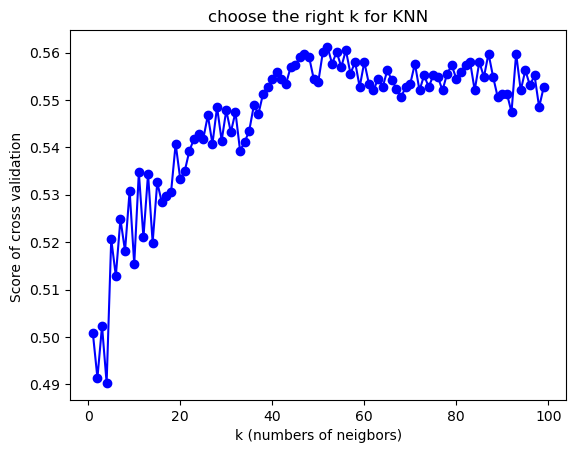

In [74]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = range(1, 100)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5).mean()
    scores.append(score)

plt.plot(k_values, scores, 'bo-')
plt.xlabel('k (numbers of neigbors)')
plt.ylabel('Score of cross validation ')
plt.title('choose the right k for KNN')
plt.show()


### CHOOSE THE RIGHT K

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[175 216]
 [205 255]]


In [76]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.45      0.45       391
           1       0.54      0.55      0.55       460

    accuracy                           0.51       851
   macro avg       0.50      0.50      0.50       851
weighted avg       0.50      0.51      0.50       851



## SAVING THE MODEL

In [77]:
import joblib

# save the model

joblib.dump(knn,"model,my_knn_model.pk1")

['model,my_knn_model.pk1']

## *CONCLUSION*

***The model was pretty simple good with the k = 5 in the first traine with the accuracy of 52% but the accuracy increased by 56 whene i choose k =43 which mean that the k value has an influence when we traine the model and the choise of k will determine the performance of the model***

***Github : TIMOTHEE NKWAR***
 **Link to the code in github** <https://github.com/TimotheeNkwar/School_Project/tree/main/Machine%20Learning>